# Shear and convergence from the lensing potential

As we have seen the shear component form a so-called spin-2 field. The shear is indeed invariant under rotations by $\pi$ rather than by $2\pi$, unlike vectors (spin-1 fields). The shear determines anisotropic distortions of the shape of the images. We may want to visualize how the shear looks like.

In this example, we use the same lens used in the example discussed in Lecture 3. We have saved the class deflector into a module (```deflector.py```), so that we can import the class into this notebook.

In [1]:
# import the deflector module
import deflector

# import pyplot
import matplotlib.pyplot as plt

%matplotlib inline

We derive again the potential map from the input kappa map. The potential will be the starting point of our calculation.

2560 2560


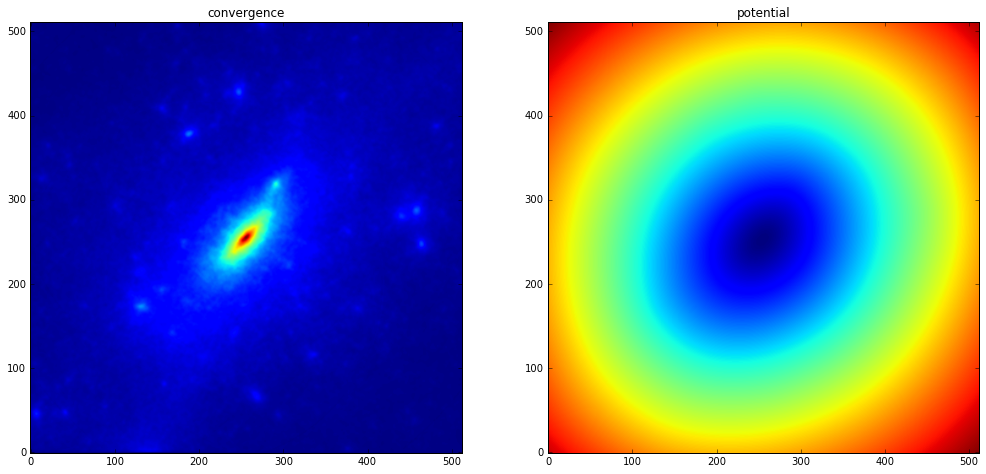

In [2]:
df=deflector.deflector('data/kappa_gl.fits',True)
kappa=df.kmap()
pot=df.potential()
kappa=df.mapCrop(kappa)
pot=df.mapCrop(pot)

fig,ax = plt.subplots(1,2,figsize=(17,8))
ax[0].imshow(kappa,origin="lower")
ax[0].set_title('convergence')
ax[1].imshow(pot,origin="lower")
ax[1].set_title('potential')

Both shear and convergence are obtained linear combinations of the second derivatives of the potential. To compute these derivatives, we can use the ```numpy.gradient``` method. If we take the gradient of the lensing potential, we obtain the deflection angle.

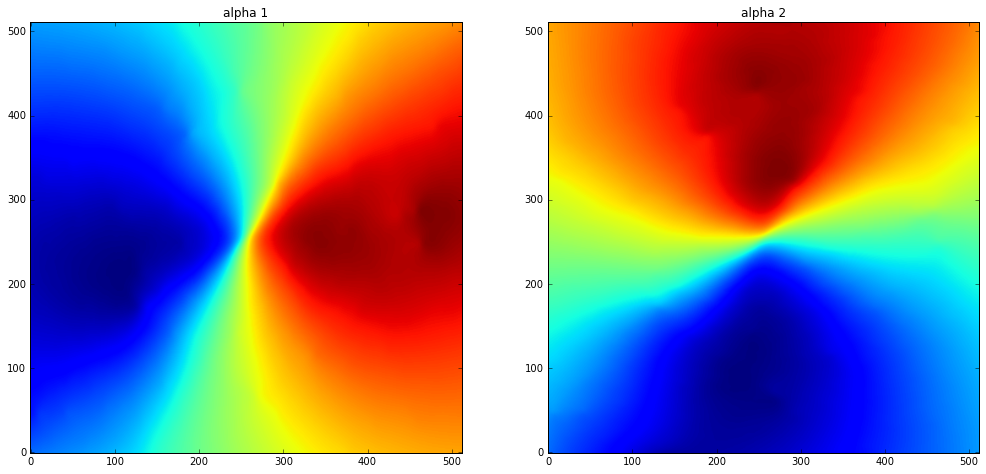

In [3]:
import numpy as np
#first derivative of the potential (the deflection angles)
a2,a1=np.gradient(pot)
fig,ax = plt.subplots(1,2,figsize=(17,8))
ax[0].imshow(a1,origin="lower")
ax[0].set_title('alpha 1')
ax[1].imshow(a2,origin="lower")
ax[1].set_title('alpha 2')

Now, we can take the gradients of the two components of the deflection angle to obtain the second derivatives of the lensing potential:

In [4]:
a12,a11=np.gradient(a1)
a22,a21=np.gradient(a2)

These derivatives can be combined to obtain back the map of the convergence, which is 
$$
\kappa=\frac{1}{2}\left(\frac{\partial^2 \hat\Psi}{\partial \theta_1^2}+\frac{\partial^2 \hat\Psi}{\partial \theta_2^2}\right)
$$

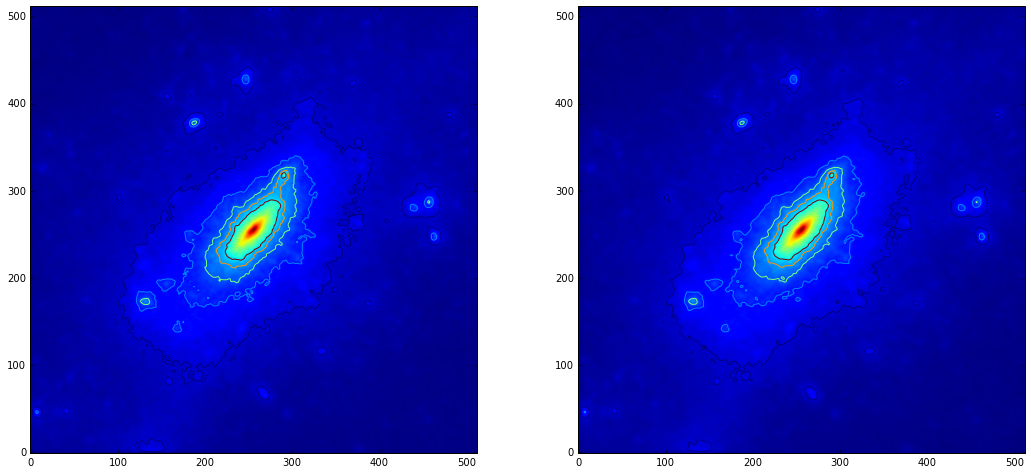

In [5]:
ka=0.5*(a11+a22)
# compare with the input convergence map:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(kappa,origin='lower')
ax[0].contour(kappa,levels=[0.2,0.4,0.6,0.8,1.0])
ax[1].imshow(ka,origin='lower')
ax[1].contour(ka,levels=[0.2,0.4,0.6,0.8,1.0])

Similarly, we can obtain the components of the shear:
$$
\gamma_1=\frac{1}{2}\left(\frac{\partial^2 \hat\Psi}{\partial \theta_1^2}-\frac{\partial^2 \hat\Psi}{\partial \theta_2^2}\right)
$$
and
$$
\gamma_2=\frac{\partial^2 \hat\Psi}{\partial \theta_1\partial \theta_2}
$$

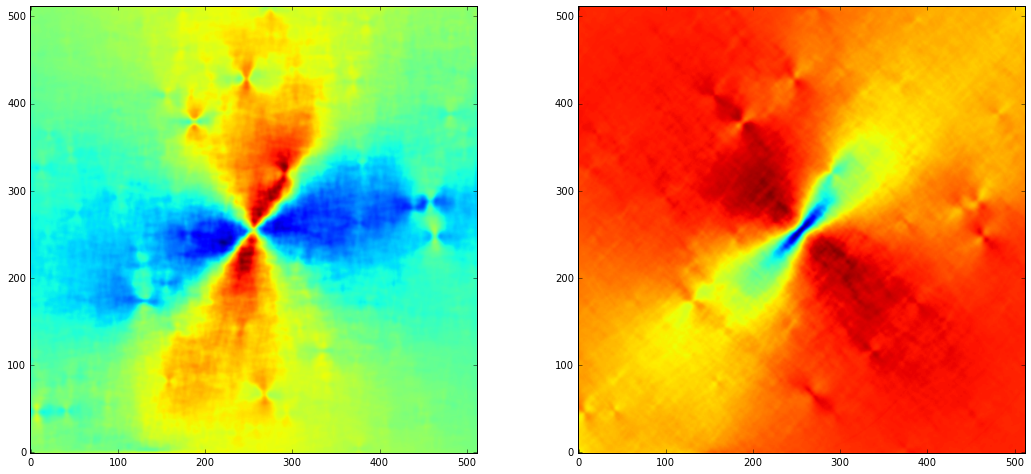

In [6]:
gamma_1=0.5*(a11-a22)
gamma_2=a12
# plotting the shear components:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(gamma_1,origin='lower')
ax[1].imshow(gamma_2,origin='lower')

We can also visualize the correlation between shear and convergence. In the plot below

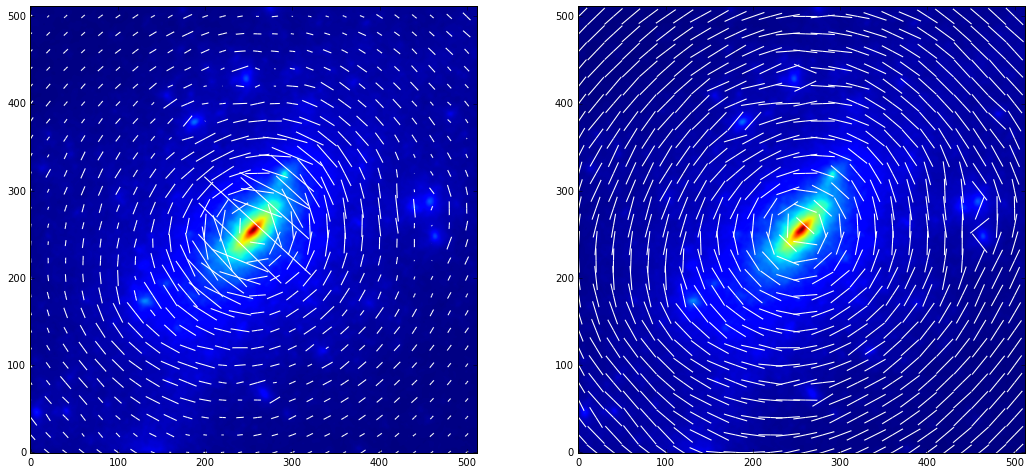

In [7]:
#shear pattern
pixel_step=20
x,y = np.meshgrid(np.arange(0,gamma_1.shape[1],pixel_step),np.arange(0,gamma_1.shape[0],pixel_step))


#Translate shear components into sines and cosines
cos_2_phi = -gamma_1 / np.sqrt(gamma_1**2 + gamma_2**2)
sin_2_phi = gamma_2 / np.sqrt(gamma_1**2 + gamma_2**2)
#Compute stick directions
cos_phi = np.sqrt(0.5*(1.0 + cos_2_phi)) * np.sign(sin_2_phi)
sin_phi = np.sqrt(0.5*(1.0 - cos_2_phi))
#Fix ambiguity when sin_2_phi = 0
cos_phi[sin_2_phi==0] = np.sqrt(0.5*(1.0 + cos_2_phi[sin_2_phi==0]))
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(ka,origin='lower')
ax[1].imshow(ka,origin='lower')
gamma=np.sqrt(gamma_1**2+gamma_2**2)*4
# showing the intensity and the orientation of the shear
ax[0].quiver(y,x,gamma[x,y]*sin_phi[x,y],gamma[x,y]*cos_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="white")
ax[0].quiver(y,x,-gamma[x,y]*sin_phi[x,y],-gamma[x,y]*cos_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="white")

# showing only the orientation of the shear
ax[1].quiver(y,x,sin_phi[x,y],cos_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="white")
ax[1].quiver(y,x,-sin_phi[x,y],-cos_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="white")
# showing only the orientation of the shear

The plot shows that the shear traces the matter distribution, which suggests us that we may be able to reconstruct the mass map, if we could measure the shear field. 

# Critical lines

Critical lines are defined by the equations
$$ \lambda_t=1-\kappa-\gamma=0$$
and
$$ \lambda_r=1-\kappa+\gamma=0$$
where $\gamma=(\gamma_1^2+\gamma_2^2)^{1/2}$.

Since the $\lambda_t$ and $\lambda_r$ are the eigenvalues of the lensing Jacobian, they can be visualized as the zero-level countours of the map of $\det A$.

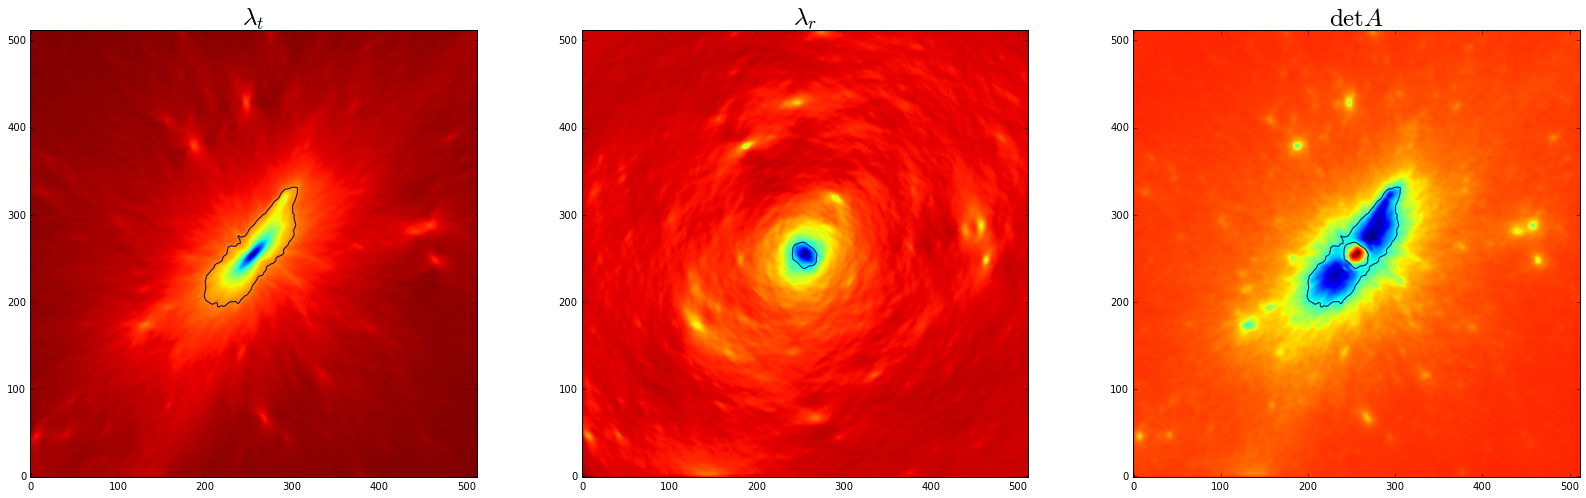

In [8]:
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm

gamma=np.sqrt(gamma_1**2+gamma_2**2)
detA=(1.0-ka-gamma)*(1.0-ka+gamma)
lambdat=1.0-ka-gamma
lambdar=1.0-ka+gamma

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].imshow(lambdat,origin='lower')
ax[0].contour(lambdat,levels=[0.0])
ax[0].set_title('$\lambda_t$',fontsize=25)
ax[1].imshow(lambdar,origin='lower')
ax[1].contour(lambdar,levels=[0.0])
ax[1].set_title('$\lambda_r$',fontsize=25)
ax[2].imshow(detA,origin='lower',norm=SymLogNorm(0.3))
ax[2].contour(detA,levels=[0.0])
ax[2].set_title('$\det A$',fontsize=25)

The size of the critical lines depends on redshift:

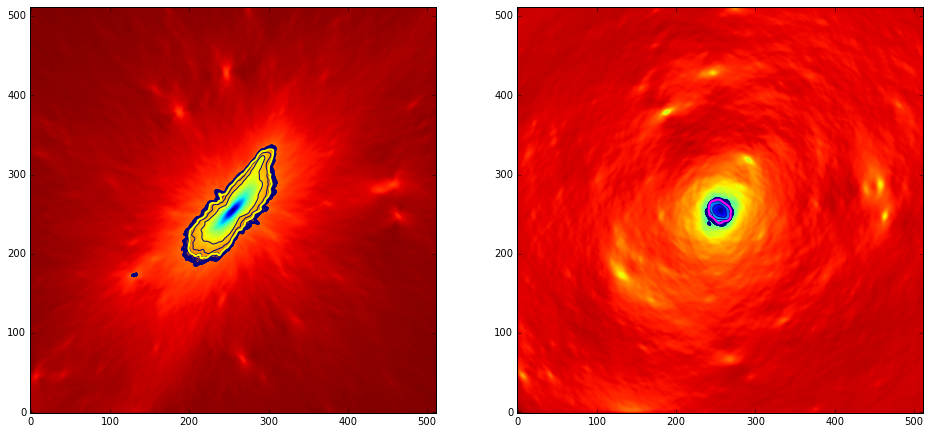

In [9]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

zl=0.3
zs=np.linspace(zl,10.0,20)
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(ds.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl,zs[i]).value)
    
zs_norm=2.0
ds_norm=cosmo.angular_diameter_distance(zs_norm)
dls_norm=cosmo.angular_diameter_distance_z1z2(zl,zs_norm)

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(lambdat,origin='lower')
ax[1].imshow(lambdar,origin='lower')
for i in range(ds.size):
    kappa_new=ka*ds_norm.value/dls_norm.value*dls[i]/ds[i].value
    gamma_new=gamma*ds_norm.value/dls_norm.value*dls[i]/ds[i].value
    lambdat_new=(1.0-kappa_new-gamma_new)
    lambdar_new=(1.0-kappa_new+gamma_new)
    ax[0].contour(lambdat_new,levels=[0.0])
    ax[1].contour(lambdar_new,levels=[0.0])

ax[0].contour(lambdat,levels=[0.0],colors="yellow",linewidths=2)
ax[1].contour(lambdar,levels=[0.0],colors="magenta",linewidths=2)

# Caustics

The caustics are the "sources" of the critical lines. In other words, if $\vec\theta_c$ defines a set of points belonging to the critical lines, then 

$$\vec\beta_c=\vec\theta_c-\vec\alpha(\vec\theta_c)$$

defines a set of points belonging to the caustics.

To procede to the calculation of the caustics, we need first to gather the deflection angles. In the following, I will work in pixel units:

(0, 512)

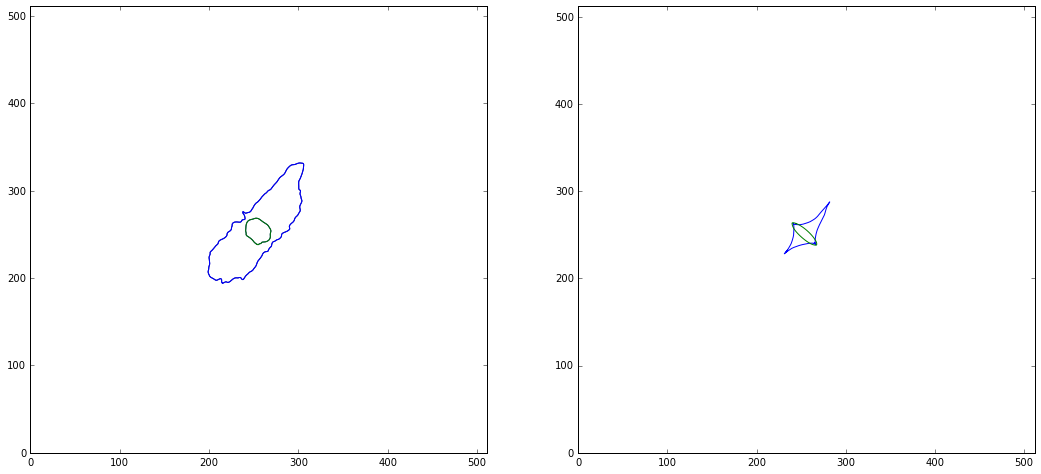

In [13]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
cs=ax[0].contour(detA,levels=[0.0])

contour=cs.collections[0]
p=contour.get_paths() # p contains the paths of each individual critical line
sizevs=np.empty(len(p),dtype=int)

from scipy.ndimage import map_coordinates

if (sizevs.size > 0):
    for j in range(len(p)):
        # for each path, we create two vectors containing the x1 and x2 coordinates of the vertices
        vs = contour.get_paths()[j].vertices 
        sizevs[j]=len(vs)
        x1=[]
        x2=[]
        for i in range(len(vs)):
            xx1,xx2=vs[i]
            x1.append(float(xx1))
            x2.append(float(xx2))
        # thse are the points we want to map back on the source plane. 
        # To do that we need to evaluate the deflection angle at their positions
        # using scipy.ndimage.interpolate.map_coordinates we perform a bi-linear interpolation
        a_1=map_coordinates(a1, [[x2],[x1]],order=1)
        a_2=map_coordinates(a2, [[x2],[x1]],order=1)
        
        # now we can make the mapping using the lens equation:
        y1=x1-a_1[0]
        y2=x2-a_2[0]
        
        # plot the results!
        ax[0].plot(x1,x2,'-')
        ax[1].plot(y1,y2,'-')
        
ax[1].set_xlim([0,512])
ax[1].set_ylim([0,512])

Left and right panels show the lens and the source planes, respectively. They display exactly the same region of the sky. 

# Second order lensing effects

From the maps of the convergence and of the shear, we can derive the maps of the flexion F and G, where
$$
F=(\gamma_{1,1}+\gamma_{2,2})+i(\gamma_{2,1}-\gamma_{1,2})
$$
and
$$
G=(\gamma_{1,1}-\gamma_{2,2})+i(\gamma_{2,1}+\gamma_{1,2})
$$

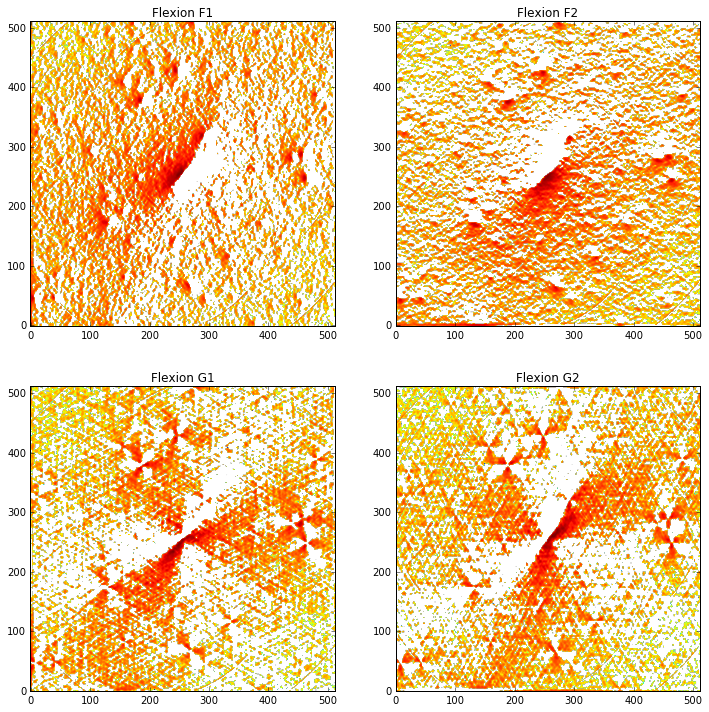

In [11]:
gamma12,gamma11=np.gradient(gamma_1)
gamma22,gamma21=np.gradient(gamma_2)
F1,F2=gamma11+gamma22,gamma21-gamma12
G1,G2=gamma11-gamma22,gamma21+gamma12

fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(F1,origin='lower',norm=LogNorm())
ax[0,0].set_title('Flexion F1')
ax[0,1].imshow(F2,origin='lower',norm=LogNorm())
ax[0,1].set_title('Flexion F2')
ax[1,0].imshow(G1,origin='lower',norm=LogNorm())
ax[1,0].set_title('Flexion G1')
ax[1,1].imshow(G2,origin='lower',norm=LogNorm())
ax[1,1].set_title('Flexion G2')

These maps show some interesting features:
* the features in the flexion F maps have dipole symmetry, as expected for a spin-1 field;
* the features in the flexion G maps have triangular symmetry, denoting the spin-3 nature of this field, which is invariant under rotations by 2$\pi$/3 radians;
* in both the cases of the flexion F and G, the signal of the small scale structures in the convergence map is amplified (flexion is obtained via third-order derivatives of the lensing potential). 